<a id='top'></a>

# Data Engineering of DAVIES Data by American Soccer Analysis
##### Notebook to engineer data downloaded from [DAVIES](https://samgoldberg1882.shinyapps.io/ShinyAlph/) by [American Soccer Analysis](https://www.americansocceranalysis.com/).

### By [Edd Webster](https://www.twitter.com/eddwebster)
Notebook first written: 13/09/2020<br>
Notebook last updated: 30/12/2020

![title](../../img/american_soccer_analysis_logo.png)

___

<a id='sectionintro'></a>

## <a id='import_libraries'>Introduction</a>
This notebook engineers data downloaded from [DAVIES](https://samgoldberg1882.shinyapps.io/ShinyAlph/) by [American Soccer Analysis] as DataFrames using [pandas](http://pandas.pydata.org/) for data manipulation and [matplotlib](https://matplotlib.org/) for visualisation.

For more information about this notebook and the author, I'm available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/);
*    edd.j.webster@gmail.com;
*    [@eddwebster](https://www.twitter.com/eddwebster);
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/);
*    [github/eddwebster](https://github.com/eddwebster/);
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster);
*    [kaggle.com/eddwebster](https://www.kaggle.com/eddwebster); and
*    [hackerrank.com/eddwebster](https://www.hackerrank.com/eddwebster).

![title](../../img/fifa21eddwebsterbanner.png)

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/football_analytics) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/A%29%20Web%20Scraping/TransferMarkt%20Web%20Scraping%20and%20Parsing.ipynb).

___

<a id='sectioncontents'></a>

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Project Brief](#section2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Data Dictionary](#section3.2)<br>
      3.    [Creating the DataFrame](#section3.3)<br>
      4.    [Initial Data Handling](#section3.4)<br>
      5.    [Export the Raw DataFrame](#section3.5)<br>         
4.    [Data Engineering](#section4)<br>
      1.    [Introduction](#section4.1)<br>
      2.    [Columns of Interest](#section4.2)<br>
      3.    [String Cleaning](#section4.3)<br>
      4.    [Converting Data Types](#section4.4)<br>
      5.    [Export the Engineered DataFrame](#section4.5)<br>
5.    [Exploratory Data Analysis (EDA)](#section5)<br>
      1.    [...](#section5.1)<br>
      2.    [...](#section5.2)<br>
      3.    [...](#section5.3)<br>
6.    [Summary](#section6)<br>
7.    [Next Steps](#section7)<br>
8.    [Bibliography](#section8)<br>

___

<a id='section1'></a>

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing;
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation;
*    [`Beautifulsoup`](https://pypi.org/project/beautifulsoup4/) for web scraping; and
*    [`matplotlib`](https://matplotlib.org/contents.html?v=20200411155018) for data visualisations;

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [24]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
import math
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd
import os
import re
import random
from io import BytesIO
from pathlib import Path

# Reading directories
import glob
import os
from os.path import basename

# Flatten lists
from functools import reduce

# Working with JSON
import json
from pandas.io.json import json_normalize

# Web Scraping
import requests
from bs4 import BeautifulSoup
import re

# Currency Convert
from forex_python.converter import CurrencyRates

# APIs
from tyrone_mings import * 

# Fuzzy Matching - Record Linkage
import recordlinkage
import jellyfish
import numexpr as ne

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno

# Progress Bar
from tqdm import tqdm

# Display in Jupyter
from IPython.display import Image, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print('Setup Complete')

Setup Complete


In [25]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))
print('Seaborn: {}'.format(sns.__version__))

Python: 3.7.6
NumPy: 1.18.1
pandas: 1.0.1
matplotlib: 3.1.3
Seaborn: 0.10.0


### Defined Variables

In [26]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

### Defined Filepaths

In [27]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..', )
data_dir = os.path.join(base_dir, 'data')
data_dir_davies = os.path.join(base_dir, 'data', 'DAVIES')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
video_dir = os.path.join(base_dir, 'video')

### Notebook Settings

In [28]:
pd.set_option('display.max_columns', None)

---

<a id='section2'></a>

## <a id='#section2'>2. Project Brief</a>
This Jupyter notebook engineered scraped football data from [TransferMarkt](https://www.transfermarkt.co.uk/) using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames.

The data of player values produced in this notebook is exported to CSV. This data can be further analysed in Python, joined to other datasets, or explored using dashboarding tools such as Tableau or PowerBI, or explores in a spreadsheet such as Microsoft Excel or Google Sheets.

---

<a id='section3'></a>

## <a id='#section3'>3. Data Sources</a>
...

DAVIES (Determining Added Value of Individual Effectiveness including Style) model, named after Alphonso Davies. To read more more about the model, see the following [[link](https://www.americansocceranalysis.com/home/2020/9/16/davies-determining-added-value-of-individual-effectiveness-including-style)].

Before conducting our EDA, the data needs to be imported as a DataFrame in the Data Sources section [Section 3](#section3) and cleaned in the Data Engineering section [Section 4](#section4).

We'll be using the [pandas](http://pandas.pydata.org/) library to import our data to this workbook as a DataFrame.

### <a id='#section3.1'>3.1. Import the Dataset</a>

In [29]:
# Import DataFrame as a CSV file
df_davies = pd.read_csv(data_dir_davies + '/raw/DAVIES_extract_big5_latest.csv')
#df_davies = pd.read_csv(data_dir + '/export/DAVIES_extract_big5_latest.csv'')

### <a id='#section3.2'>3.2. Preliminary Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [30]:
# Display the first 5 rows of the raw DataFrame, df_davies
df_davies.head()

,Unnamed: 0,Player,Nation,Team,League,Season,TeamElo,AgeDuringSeason,CurrentAge,Position,PlayStyle,Min,Starts,PercentLeftFooted,PercentRightFooted,Footedness,DAVIES,DAVIESPer90,xGoalsAdded,xGoalsAddedAbovePlayStyle,xGoalsAddedPer90,Salary($),xSalary($),CurrentMarketValue(€),xMarketValue(€),xGAM
0,1,Lionel Messi,ARG,Barcelona,La Liga,2017-2018,2025.35,30.0,33,"FW,MF",Dribbler,3002,32,90.49,9.51,Left,17.37,0.38,20.57,17.57,0.62,NaN,NaN,100000000.0,NaN,NaN
1,2,Kylian Mbappe,FRA,Paris S-G,Ligue 1,2018-2019,1824.47,19.0,22,FW,Finisher,2343,24,17.43,82.57,Right,15.52,0.42,17.76,14.35,0.68,21084114.0,21334642.0,180000000.0,NaN,NaN
2,3,Lionel Messi,ARG,Barcelona,La Liga,2019-2020,1964.47,32.0,33,"FW,MF",Playmaker,2880,32,91.69,8.31,Left,14.85,0.34,18.56,14.87,0.58,80023053.0,26591781.0,100000000.0,90076300.0,NaN
3,4,Lionel Messi,ARG,Barcelona,La Liga,2018-2019,1997.04,31.0,33,FW,Playmaker,2713,29,92.45,7.55,Left,14.47,0.36,18.18,14.50,0.60,80023053.0,24928834.0,100000000.0,NaN,NaN
4,5,Carlos Vela,MEX,Los Angeles FC,MLS,2019,NaN,29.0,31,FW,Playmaker,2723,31,88.59,11.41,Left,13.45,0.34,17.36,13.67,0.57,6300000.0,6604522.0,15000000.0,NaN,1066408.0


In [31]:
# Display the last 5 rows of the raw DataFrame, df_davies
df_davies.tail()

,Unnamed: 0,Player,Nation,Team,League,Season,TeamElo,AgeDuringSeason,CurrentAge,Position,PlayStyle,Min,Starts,PercentLeftFooted,PercentRightFooted,Footedness,DAVIES,DAVIESPer90,xGoalsAdded,xGoalsAddedAbovePlayStyle,xGoalsAddedPer90,Salary($),xSalary($),CurrentMarketValue(€),xMarketValue(€),xGAM
8598,8599,Romain Philippoteaux,FRA,Brest,Ligue 1,2020-2021,1535.14,32.84,32,"FW,MF",Dribbler,259,3,8.89,91.11,Right,-3.76,-0.15,0.30,-2.70,0.10,NaN,NaN,NaN,NaN,NaN
8599,8600,Admir Mehmedi,SUI,Wolfsburg,Bundesliga,2017-2018,1599.49,26.00,29,"FW,MF",Playmaker,290,3,12.07,87.93,Right,-3.78,-0.19,0.13,-3.55,0.04,NaN,NaN,6000000.0,NaN,NaN
8600,8601,Oscar Romero,PAR,Alaves,La Liga,2017-2018,1704.90,25.00,28,"MF,FW",Playmaker,253,2,86.44,13.56,Left,-3.79,-0.19,0.13,-3.56,0.04,NaN,NaN,NaN,NaN,NaN
8601,8602,Davy Klaassen,NED,Everton,Premier League,2017-2018,1695.62,24.00,27,"MF,FW",Playmaker,251,3,24.44,75.56,Right,-3.80,-0.19,0.12,-3.57,0.04,NaN,NaN,NaN,NaN,NaN
8602,8603,Jimmy Briand,FRA,Bordeaux,Ligue 1,2020-2021,1568.08,35.42,35,FW,Finisher,438,1,6.32,93.68,Right,-3.83,-0.19,0.29,-3.12,0.06,NaN,NaN,1600000.0,NaN,NaN


In [32]:
# Print the shape of the raw DataFrame, df_davies
print(df_davies.shape)

(8603, 26)


In [33]:
# Print the column names of the raw DataFrame, df_davies
print(df_davies.columns)

Index(['Unnamed: 0', 'Player', 'Nation', 'Team', 'League', 'Season', 'TeamElo',
       'AgeDuringSeason', 'CurrentAge', 'Position', 'PlayStyle', 'Min',
       'Starts', 'PercentLeftFooted', 'PercentRightFooted', 'Footedness',
       'DAVIES', 'DAVIESPer90', 'xGoalsAdded', 'xGoalsAddedAbovePlayStyle',
       'xGoalsAddedPer90', 'Salary($)', 'xSalary($)', 'CurrentMarketValue(€)',
       'xMarketValue(€)', 'xGAM'],
      dtype='object')


The dataset has thirteen features (columns). Full details of these attributes can be found in the [Data Dictionary](section3.3.1).

In [34]:
# Data types of the features of the raw DataFrame, df_davies
df_davies.dtypes

Unnamed: 0                     int64
Player                        object
Nation                        object
Team                          object
League                        object
Season                        object
TeamElo                      float64
AgeDuringSeason              float64
CurrentAge                     int64
Position                      object
PlayStyle                     object
Min                            int64
Starts                         int64
PercentLeftFooted            float64
PercentRightFooted           float64
Footedness                    object
DAVIES                       float64
DAVIESPer90                  float64
xGoalsAdded                  float64
xGoalsAddedAbovePlayStyle    float64
xGoalsAddedPer90             float64
Salary($)                    float64
xSalary($)                   float64
CurrentMarketValue(€)        float64
xMarketValue(€)              float64
xGAM                         float64
dtype: object

All thirteen of the columns have the object data type. Full details of these attributes and their data types can be found in the [Data Dictionary](section3.3.1).

In [35]:
# Info for the raw DataFrame, df_davies
df_davies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8603 entries, 0 to 8602
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8603 non-null   int64  
 1   Player                     8603 non-null   object 
 2   Nation                     8595 non-null   object 
 3   Team                       8603 non-null   object 
 4   League                     8603 non-null   object 
 5   Season                     8603 non-null   object 
 6   TeamElo                    7624 non-null   float64
 7   AgeDuringSeason            8603 non-null   float64
 8   CurrentAge                 8603 non-null   int64  
 9   Position                   8603 non-null   object 
 10  PlayStyle                  8603 non-null   object 
 11  Min                        8603 non-null   int64  
 12  Starts                     8603 non-null   int64  
 13  PercentLeftFooted          8603 non-null   float

In [36]:
# Description of the raw DataFrame, df_davies, showing some summary statistics for each numberical column in the DataFrame
df_davies.describe()

,Unnamed: 0,TeamElo,AgeDuringSeason,CurrentAge,Min,Starts,PercentLeftFooted,PercentRightFooted,DAVIES,DAVIESPer90,xGoalsAdded,xGoalsAddedAbovePlayStyle,xGoalsAddedPer90,Salary($),xSalary($),CurrentMarketValue(€),xMarketValue(€),xGAM
count,8603.000000,7624.000000,8603.000000,8603.000000,8603.000000,8603.000000,8603.000000,8603.000000,8603.000000,8603.000000,8603.000000,8603.000000,8603.000000,3.423000e+03,3.423000e+03,4.407000e+03,1.630000e+03,9.570000e+02
mean,4302.000000,1673.629104,25.927268,27.728467,1417.049518,15.861792,32.708602,67.291398,0.052385,-0.000120,2.953988,0.073617,0.181817,2.499961e+06,2.451252e+06,1.320363e+07,1.263029e+07,1.997134e+05
std,2483.616516,126.067809,4.112712,4.196434,826.301771,9.560760,31.217909,31.217909,2.210403,0.062847,2.286901,2.214602,0.078455,4.284846e+06,2.897570e+06,1.864717e+07,1.487463e+07,1.527401e+05
min,1.000000,1403.910000,15.000000,17.000000,251.000000,0.000000,0.680000,2.150000,-3.830000,-0.260000,-0.060000,-3.570000,-0.020000,2.035700e+04,1.080160e+05,1.000000e+05,3.930880e+05,5.529000e+03
25%,2151.500000,1581.150000,23.000000,25.000000,713.500000,8.000000,11.120000,35.115000,-1.550000,-0.040000,1.240000,-1.550000,0.130000,5.236250e+05,9.731810e+05,2.200000e+06,3.496144e+06,8.477300e+04
50%,4302.000000,1660.590000,26.000000,28.000000,1239.000000,14.000000,16.760000,83.240000,-0.430000,0.000000,2.380000,-0.440000,0.170000,1.149035e+06,1.462302e+06,6.500000e+06,7.034449e+06,1.578730e+05
75%,6452.500000,1741.920000,29.000000,31.000000,2066.000000,23.500000,64.885000,88.880000,1.200000,0.030000,4.085000,1.260000,0.220000,2.948361e+06,3.162295e+06,1.600000e+07,1.602481e+07,2.831880e+05
max,8603.000000,2049.700000,43.300000,43.000000,3420.000000,38.000000,97.850000,99.320000,17.370000,0.590000,20.570000,17.570000,0.840000,8.002305e+07,2.659178e+07,1.800000e+08,1.154958e+08,1.066408e+06


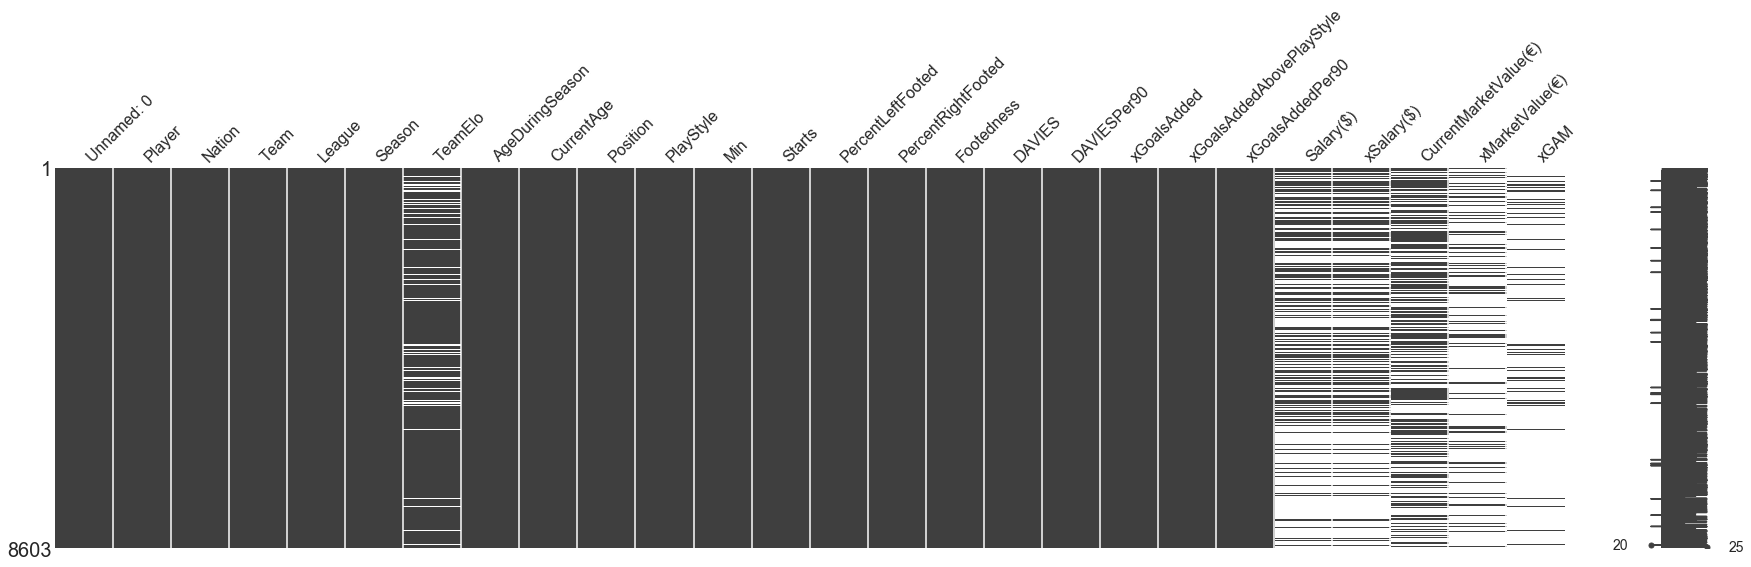

In [37]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_davies
msno.matrix(df_davies, figsize = (30, 7))

In [38]:
# Counts of missing values
davies_null_value_stats = df_davies.isnull().sum(axis=0)
davies_null_value_stats[davies_null_value_stats != 0]

Nation                      8
TeamElo                   979
Salary($)                5180
xSalary($)               5180
CurrentMarketValue(€)    4196
xMarketValue(€)          6973
xGAM                     7646
dtype: int64

The visualisation shows us very quickly that there a few missing values in most of the columns, but the dataset is ready for us.

## <a id='#section4'>4. Data Engineering</a>
Before we answer the questions in the brief through [Exploratory Data Analysis (EDA)](#section5), we'll first need to clean and wrangle the datasets to a form that meet our needs.

### <a id='#section4.1'>4.1. String Cleaning</a>

##### Name

In [39]:
df_davies['name_lower'] = df_davies['Player'].str.normalize('NFKD')\
                                             .str.encode('ascii', errors='ignore')\
                                             .str.decode('utf-8')\
                                             .str.lower()

In [40]:
# First Name Lower
df_davies['firstname_lower'] = df_davies['name_lower'].str.rsplit(' ', 0).str[0]

# Last Name Lower
df_davies['lastname_lower'] = df_davies['name_lower'].str.rsplit(' ', 1).str[-1]

# First Initial Lower
df_davies['firstinitial_lower'] = df_davies['name_lower'].astype(str).str[0]

##### Season

In [41]:
dict_seasons = {
    '2017-2018': '17/18',
    '2018-2019': '18/19',
    '2019-2020': '19/20',
    '2020-2021': '20/21',
}

In [42]:
# Map grouped positions to DataFrame
df_davies['Season'] = df_davies['Season'].map(dict_seasons)

### <a id='#section4.2'>4.2. Drop Unnecessary Columns</a>

In [43]:
df_davies = df_davies.drop(['Unnamed: 0'], axis=1)

### <a id='#section4.3'>4.3. Filter Players in 'Big 5' European Leagues</a>

In [44]:
# Filter plays in the Big 5 European Leagues

## Define list of countries
lst_big5_leagues = ['La Liga', 'Bundesliga', 'Serie A', 'Premier League', 'Ligue 1']

## Filter list of Big 5 European League countries from DataFrame
df_davies_big5 = df_davies[df_davies['League'].isin(lst_big5_leagues)]

### <a id='#section4.4'>4.4. Exporting the Engineered DataFrames</a>
Export the two engineered DataFrames CSV files.

In [45]:
# Export DataFrame as a CSV file

## All data

### Export a copy to the 'archive' subfolder of the DAVIES folder, including the date
df_davies.to_csv(data_dir_davies + '/engineered/archive/' + f'davies_all_last_updated_{today}.csv', index=None, header=True)

### Export another copy to the DAVIES folder called 'latest' (can be overwritten)
df_davies.to_csv(data_dir_davies + '/engineered/' + 'davies_all_latest.csv', index=None, header=True)


## Big 5 European Leagues

### Export a copy to the 'archive' subfolder of the DAVIES folder, including the date
df_davies_big5.to_csv(data_dir_davies + f'/engineered/archive/' + f'davies_big5_last_updated_{today}.csv', index=None, header=True)

### Export another copy to the DAVIES folder called 'latest' (can be overwritten)
df_davies_big5.to_csv(data_dir_davies + f'/engineered/' + 'davies_big5_latest.csv', index=None, header=True)

## <a id='#section5'>5. Exploratory Data Analysis</a>

In [47]:
df_davies_big5.head()

,Player,Nation,Team,League,Season,TeamElo,AgeDuringSeason,CurrentAge,Position,PlayStyle,Min,Starts,PercentLeftFooted,PercentRightFooted,Footedness,DAVIES,DAVIESPer90,xGoalsAdded,xGoalsAddedAbovePlayStyle,xGoalsAddedPer90,Salary($),xSalary($),CurrentMarketValue(€),xMarketValue(€),xGAM,name_lower,firstname_lower,lastname_lower,firstinitial_lower
0,Lionel Messi,ARG,Barcelona,La Liga,17/18,2025.35,30.0,33,"FW,MF",Dribbler,3002,32,90.49,9.51,Left,17.37,0.38,20.57,17.57,0.62,NaN,NaN,100000000.0,NaN,NaN,lionel messi,lionel,messi,l
1,Kylian Mbappe,FRA,Paris S-G,Ligue 1,18/19,1824.47,19.0,22,FW,Finisher,2343,24,17.43,82.57,Right,15.52,0.42,17.76,14.35,0.68,21084114.0,21334642.0,180000000.0,NaN,NaN,kylian mbappe,kylian,mbappe,k
2,Lionel Messi,ARG,Barcelona,La Liga,19/20,1964.47,32.0,33,"FW,MF",Playmaker,2880,32,91.69,8.31,Left,14.85,0.34,18.56,14.87,0.58,80023053.0,26591781.0,100000000.0,90076300.0,NaN,lionel messi,lionel,messi,l
3,Lionel Messi,ARG,Barcelona,La Liga,18/19,1997.04,31.0,33,FW,Playmaker,2713,29,92.45,7.55,Left,14.47,0.36,18.18,14.50,0.60,80023053.0,24928834.0,100000000.0,NaN,NaN,lionel messi,lionel,messi,l
5,Mohamed Salah,EGY,Liverpool,Premier League,18/19,2043.53,26.0,28,FW,Finisher,3250,37,83.56,16.44,Left,13.05,0.22,16.61,13.20,0.46,13721032.0,11561997.0,120000000.0,NaN,NaN,mohamed salah,mohamed,salah,m


## <a id='#section6'>6. Summary</a>
This Jupyter notebook engineered scraped football data from [TransferMarkt](https://www.transfermarkt.co.uk/) using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames.

## <a id='#section7'>7. Next Steps</a>
The step is to use this data and match it to FBref, 21st Club, Opta, FIFA, and other datasets.

## <a id='#section8'>8. References</a>
...

---

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)